# Lecture 6: Working with Pandas DataFrames
ENVR 890-010: Python for Environmental Research, Fall 2021

September 29, 2021

By Andrew Hamilton. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
The final important data structure we will cover is the **Pandas DataFrame**, from the [Pandas package](https://pandas.pydata.org/docs/user_guide/index.html#user-guide). Pandas makes it easy to load and manipulate multi-variate datasets, which makes it great for data analysis and visualization. 

### Creating Pandas DataFrames 
A Pandas DataFrame is similar to a dictionary, in that it is a collection of **keys** and **values**. However, it is more restrictive, in that all values must be lists with the same length and a shared index. This makes it ideal for multivariate datasets, in which we have many different observations of the same set of variables (the name "Pandas" derives from "panel data").

An example will make this more clear. Consider again the county groundwater testing subsidization program that we introduced in the class exercise for list comprehensions (Lecture 4).

In [1]:
import random
## numeric index for each household in county
household = ['H' + str(i) for i in list(range(1000))]
print(household[:20])

['H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19']


In [2]:
## water source for each household
water = [random.choices(['municipal', 'private'], weights = [0.6, 0.4], k=1)[0] for h in household]
print(water[:20])

['private', 'municipal', 'municipal', 'municipal', 'private', 'municipal', 'private', 'municipal', 'private', 'municipal', 'municipal', 'municipal', 'private', 'municipal', 'private', 'private', 'private', 'private', 'municipal', 'municipal']


In [3]:
## income for each household 
income = [max(random.gauss(50000, 20000), 0) for h in household]
print(income[:20])

[32951.30879332786, 36513.18520458284, 27104.418446351312, 48580.72045649525, 56106.87021476578, 64985.76298728341, 23816.53866633158, 96233.5531314107, 63016.7681459389, 42838.467304314414, 10889.828243064512, 79361.30446569344, 57195.17232719519, 58168.92189412799, 62577.06195465189, 60436.0135102712, 45158.93726758766, 63068.13516544231, 70536.90288465167, 80574.29034428792]


Because each of these three lists is the same length, we can create a Pandas DataFrame as follows. Pandas is typically imported with the **alias** ``pd``.

In [6]:
import pandas as pd

county = pd.DataFrame({'household': household, 'water': water, 'income': income})
county

,household,water,income
0,H0,private,32951.308793
1,H1,municipal,36513.185205
2,H2,municipal,27104.418446
3,H3,municipal,48580.720456
4,H4,private,56106.870215
...,...,...,...
995,H995,private,62819.162649
996,H996,municipal,59229.295988
997,H997,municipal,73440.294567
998,H998,municipal,66037.294924


Notice that the argument used to create the DataFrame is a dictionary. Also notice that, unlike NumPy arrays, a Pandas DataFrame can be **mixed type**, but the values in each column must be the same type.

Each Pandas DataFrame has an **index**, given by the column on the far left with no name. If we don't specify the index, it is assumed to be the integers from 0 to the length of the lists in the dictionary (so that, in this case, it matches the numeric part of household list). We can also specify the index directly, and it can be anything (i.e., non-numeric):

In [7]:
county = pd.DataFrame({'water': water, 'income': income}, index = household)
county

,water,income
H0,private,32951.308793
H1,municipal,36513.185205
H2,municipal,27104.418446
H3,municipal,48580.720456
H4,private,56106.870215
...,...,...
H995,private,62819.162649
H996,municipal,59229.295988
H997,municipal,73440.294567
H998,municipal,66037.294924


But let's undo that for now, since it is convenient to have the index be consecutive integers.

In [8]:
county = pd.DataFrame({'household': household, 'water': water, 'income': income})
county

,household,water,income
0,H0,private,32951.308793
1,H1,municipal,36513.185205
2,H2,municipal,27104.418446
3,H3,municipal,48580.720456
4,H4,private,56106.870215
...,...,...,...
995,H995,private,62819.162649
996,H996,municipal,59229.295988
997,H997,municipal,73440.294567
998,H998,municipal,66037.294924


The ``head()`` and ``tail()`` functions can be used to retrieve just the first and last 5 rows:

In [9]:
county.head()

,household,water,income
0,H0,private,32951.308793
1,H1,municipal,36513.185205
2,H2,municipal,27104.418446
3,H3,municipal,48580.720456
4,H4,private,56106.870215


In [10]:
county.tail()

,household,water,income
995,H995,private,62819.162649
996,H996,municipal,59229.295988
997,H997,municipal,73440.294567
998,H998,municipal,66037.294924
999,H999,municipal,35233.764552


We can retrieve the column names (keys) using ``columns``

In [11]:
county.columns

Index(['household', 'water', 'income'], dtype='object')

And access the data in a particular column using 2 different syntaxes:

In [12]:
county['water'].head()

0      private
1    municipal
2    municipal
3    municipal
4      private
Name: water, dtype: object

In [13]:
county.water.head()

0      private
1    municipal
2    municipal
3    municipal
4      private
Name: water, dtype: object

Get the shape of the dataframe in similar manner to NumPy

In [14]:
county.shape

(1000, 3)

We create new columns in a similar manner to dictionaries:

In [15]:
## create another column for number of residents in household (again by random sampling)
import numpy as np
nrow = county.shape[0]
print(nrow)

1000


In [16]:
residents = np.random.choice([1, 2, 3, 4, 5, 6], size = nrow, p = [0.3, 0.25, 0.15, 0.15, 0.075, 0.075])
residents

array([4, 2, 5, 5, 1, 2, 2, 3, 2, 1, 1, 1, 3, 4, 4, 3, 3, 1, 1, 1, 2, 3,
       6, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 4, 2, 1, 5, 1, 2, 6, 4, 1, 2,
       4, 4, 1, 3, 3, 2, 3, 2, 5, 1, 2, 1, 4, 1, 1, 4, 4, 2, 1, 2, 3, 2,
       4, 2, 1, 1, 4, 3, 5, 3, 3, 2, 1, 1, 6, 3, 2, 4, 3, 6, 2, 2, 2, 3,
       5, 4, 1, 4, 2, 4, 3, 1, 3, 2, 2, 1, 1, 1, 4, 1, 6, 1, 5, 1, 1, 1,
       1, 1, 6, 3, 3, 5, 3, 1, 5, 1, 3, 3, 4, 3, 2, 1, 1, 2, 2, 1, 6, 2,
       2, 3, 4, 1, 6, 4, 4, 3, 6, 1, 6, 4, 3, 4, 2, 2, 2, 6, 2, 4, 4, 3,
       1, 3, 3, 6, 3, 2, 3, 4, 4, 3, 2, 1, 2, 2, 4, 2, 1, 3, 1, 1, 1, 2,
       1, 1, 6, 4, 2, 2, 1, 4, 1, 1, 2, 1, 3, 4, 1, 3, 1, 2, 1, 3, 5, 3,
       1, 2, 2, 1, 3, 5, 1, 1, 6, 2, 1, 4, 4, 2, 1, 1, 3, 3, 2, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 4, 1, 1, 6, 3, 1, 2, 1, 1, 5, 6, 1, 4, 1, 1, 4,
       3, 2, 3, 4, 2, 2, 1, 1, 2, 6, 1, 6, 4, 1, 1, 1, 1, 3, 2, 1, 3, 2,
       6, 5, 1, 2, 1, 2, 5, 2, 1, 4, 4, 2, 1, 1, 3, 1, 4, 2, 2, 3, 4, 2,
       5, 2, 6, 1, 5, 3, 1, 3, 3, 1, 2, 1, 6, 6, 4,

In [17]:
county['residents'] = residents
county.head()

,household,water,income,residents
0,H0,private,32951.308793,4
1,H1,municipal,36513.185205,2
2,H2,municipal,27104.418446,5
3,H3,municipal,48580.720456,5
4,H4,private,56106.870215,1


### Importing data
Pandas has a number of useful functions for importing data, such as ``pd.read_csv()`` and ``pd.read_excel()``. We will go into more detail about reading and manipulating datasets soon. But for now, a simple example using 5 years of historical stock prices for 5 large tech companies:

In [18]:
## import data. "header=2" tells it to ignore the first two lines and use the 3rd line as the column names.
stocks = pd.read_excel('HistoricalStockPrices.xlsx', sheet_name = 'Combined', header = 2)
stocks.head()

,Date,Apple,Microsoft,Facebook,Amazon,Tesla
0,2020-08-11,437.50,203.38,256.13,3080.67,1374.39
1,2020-08-10,450.91,208.25,263.00,3148.16,1418.57
2,2020-08-07,444.45,212.48,268.44,3167.46,1452.71
3,2020-08-06,455.61,216.35,265.28,3225.00,1489.58
4,2020-08-05,440.25,212.94,249.12,3205.03,1485.02


Notice the type for the "Date" column is automatically assumed to be **datetime64** when it is read in. 

In [19]:
stocks.Date.head()

0   2020-08-11
1   2020-08-10
2   2020-08-07
3   2020-08-06
4   2020-08-05
Name: Date, dtype: datetime64[ns]

In Pandas, datetimes can also be used directly as the index.

In [22]:
stocks = pd.read_excel('HistoricalStockPrices.xlsx', sheet_name = 'Combined', header = 2, index_col = 0)
stocks.head()

,Apple,Microsoft,Facebook,Amazon,Tesla
Date,,,,,
2020-08-11,437.50,203.38,256.13,3080.67,1374.39
2020-08-10,450.91,208.25,263.00,3148.16,1418.57
2020-08-07,444.45,212.48,268.44,3167.46,1452.71
2020-08-06,455.61,216.35,265.28,3225.00,1489.58
2020-08-05,440.25,212.94,249.12,3205.03,1485.02


The index is now a special type of object, **DatetimeIndex**, which has a number of useful properties when manipulating and plotting time series data, as we will see in two weeks (Visualization lecture).

In [23]:
print(stocks.index)

DatetimeIndex(['2020-08-11', '2020-08-10', '2020-08-07', '2020-08-06',
               '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-31',
               '2020-07-30', '2020-07-29',
               ...
               '2015-08-25', '2015-08-24', '2015-08-21', '2015-08-20',
               '2015-08-19', '2015-08-18', '2015-08-17', '2015-08-14',
               '2015-08-13', '2015-08-12'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


Text(0, 0.5, 'Price ($/share)')

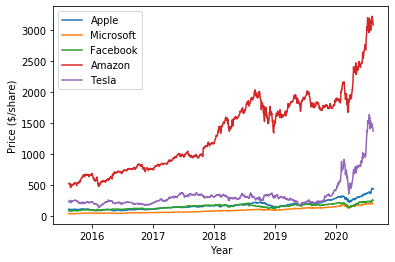

In [24]:
import matplotlib.pyplot as plt
plt.plot(stocks)
plt.legend(stocks.columns)
plt.xlabel('Year')
plt.ylabel('Price ($/share)')

### Manipulating data 
The developers of Pandas were influenced by the NumPy package, and much of NumPy's functionality is also available for Pandas DataFrames. For example, we can perform element-wise arithmetic on whole columns at a time:

In [25]:
stocks.columns

Index(['Apple', 'Microsoft', 'Facebook', 'Amazon', 'Tesla'], dtype='object')

In [26]:
## calculate relative growth of each stock
companies = []
growth = []
for c in stocks.columns:
    companies.append(c)
    growth.append(c + '_growth')
    stocks[c + '_growth'] = stocks[c] / stocks[c][-1]

print(companies)
print()
print(growth)
print()
stocks.head()

['Apple', 'Microsoft', 'Facebook', 'Amazon', 'Tesla']

['Apple_growth', 'Microsoft_growth', 'Facebook_growth', 'Amazon_growth', 'Tesla_growth']



,Apple,Microsoft,Facebook,Amazon,Tesla,Apple_growth,Microsoft_growth,Facebook_growth,Amazon_growth,Tesla_growth
Date,,,,,,,,,,
2020-08-11,437.50,203.38,256.13,3080.67,1374.39,3.796425,4.351305,2.719291,5.857789,5.770626
2020-08-10,450.91,208.25,263.00,3148.16,1418.57,3.912791,4.455499,2.792228,5.986119,5.956124
2020-08-07,444.45,212.48,268.44,3167.46,1452.71,3.856734,4.545999,2.849984,6.022818,6.099467
2020-08-06,455.61,216.35,265.28,3225.00,1489.58,3.953575,4.628798,2.816435,6.132228,6.254272
2020-08-05,440.25,212.94,249.12,3205.03,1485.02,3.820288,4.555841,2.644867,6.094256,6.235126


Text(0, 0.5, 'Growth')

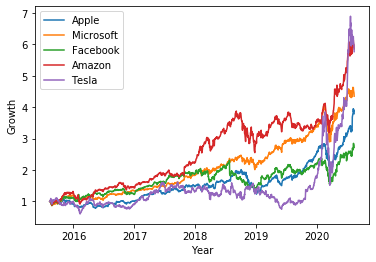

In [27]:
## plot growth
for i, c in enumerate(growth):
    plt.plot(stocks[c], label = companies[i])
plt.legend()
plt.xlabel('Year')
plt.ylabel('Growth')

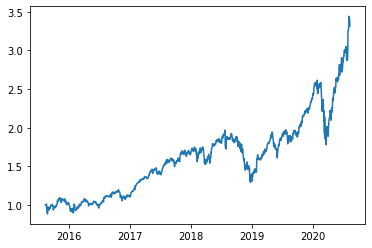

In [28]:
## How would you have done if you had bought 1 share each of Facebook and Apple stock in August 2015?
stocks['Facebook_Apple'] = stocks['Facebook'] + stocks['Apple']
stocks['Facebook_Apple_growth'] = stocks['Facebook_Apple'] / stocks['Facebook_Apple'][-1]
plt.plot(stocks['Facebook_Apple_growth'])

We can also use many NumPy functions directly on Pandas DataFrames. For example, we can create a new DataFrame to hold the statistics of the data.

In [29]:
stocks.mean()

Apple                     178.405620
Microsoft                  97.529210
Facebook                  158.644774
Amazon                   1352.001164
Tesla                     345.804722
Apple_growth                1.548122
Microsoft_growth            2.086633
Facebook_growth             1.684306
Amazon_growth               2.570784
Tesla_growth                1.451924
Facebook_Apple            337.050393
Facebook_Apple_growth       1.609370
dtype: float64

In [30]:
stocks_stats = pd.DataFrame({'mean': stocks.mean(),
                             'std': stocks.std(),
                             'min': stocks.min(),
                             'max': stocks.max(),
                             'q05': stocks.quantile(0.05),
                             'q95': stocks.quantile(0.95)})
stocks_stats

,mean,std,min,max,q05,q95
Apple,178.405620,69.985242,90.340000,455.610000,97.139000,319.268000
Microsoft,97.529210,42.799750,40.470000,216.540000,49.897000,183.630000
Facebook,158.644774,37.500433,82.090000,268.440000,99.280000,220.691000
Amazon,1352.001164,611.957225,463.370000,3225.000000,555.039000,2408.271000
Tesla,345.804722,229.829204,143.670000,1643.000000,195.435000,815.692000
Apple_growth,1.548122,0.607300,0.783929,3.953575,0.842928,2.770462
Microsoft_growth,2.086633,0.915699,0.865854,4.632863,1.067544,3.928755
Facebook_growth,1.684306,0.398136,0.871536,2.849984,1.054040,2.343041
Amazon_growth,2.570784,1.163616,0.881082,6.132228,1.055388,4.579245
Tesla_growth,1.451924,0.964980,0.603225,6.898434,0.820569,3.424831


Notice that the index is now a string: the columns of the original dataframe.

### Indexing in Pandas
Indexing in Pandas is a bit trickier than other data structures like NumPy arrays or lists. There are three main ways to retrieve data. 

First, as seen above, we can select a particular column at a time. This converts the object from a Pandas DataFrame to a **Pandas Series**, which is similar except one dimensional.

In [31]:
s = stocks_stats['mean']
s

Apple                     178.405620
Microsoft                  97.529210
Facebook                  158.644774
Amazon                   1352.001164
Tesla                     345.804722
Apple_growth                1.548122
Microsoft_growth            2.086633
Facebook_growth             1.684306
Amazon_growth               2.570784
Tesla_growth                1.451924
Facebook_Apple            337.050393
Facebook_Apple_growth       1.609370
Name: mean, dtype: float64

Once you have a series, you can index it similar to a NumPy array or list, using the integer position of the row of interest rather than the label index.

In [32]:
s[:5]

Apple         178.405620
Microsoft      97.529210
Facebook      158.644774
Amazon       1352.001164
Tesla         345.804722
Name: mean, dtype: float64

To convert into an unnamed NumPy array, use the ``values`` attribute.

In [33]:
a = s.values
a

array([ 178.40561954,   97.52920969,  158.64477363, 1352.00116362,
        345.804722  ,    1.54812235,    2.08663264,    1.68430591,
          2.57078429,    1.45192393,  337.05039317,    1.60937016])

The second way to access (and alter) data in Pandas is ``iloc``, which can be used to retrive information based on the **integer position** within the array, much like you would with a NumPy array. For example, to get the standard deviation of Amazon stock, I would use:

In [34]:
print(stocks_stats)
print()
print(stocks_stats.iloc[3, 1])

                              mean         std         min          max  \
Apple                   178.405620   69.985242   90.340000   455.610000   
Microsoft                97.529210   42.799750   40.470000   216.540000   
Facebook                158.644774   37.500433   82.090000   268.440000   
Amazon                 1352.001164  611.957225  463.370000  3225.000000   
Tesla                   345.804722  229.829204  143.670000  1643.000000   
Apple_growth              1.548122    0.607300    0.783929     3.953575   
Microsoft_growth          2.086633    0.915699    0.865854     4.632863   
Facebook_growth           1.684306    0.398136    0.871536     2.849984   
Amazon_growth             2.570784    1.163616    0.881082     6.132228   
Tesla_growth              1.451924    0.964980    0.603225     6.898434   
Facebook_Apple          337.050393  104.314165  185.210000   720.890000   
Facebook_Apple_growth     1.609370    0.498086    0.884353     3.442153   

                        

We can also retrieve **slices** of data using ``iloc``, similar to NumPy.

In [35]:
stocks_stats.iloc[3, :] 

mean    1352.001164
std      611.957225
min      463.370000
max     3225.000000
q05      555.039000
q95     2408.271000
Name: Amazon, dtype: float64

In [36]:
stocks_stats.iloc[:,-1] 

Apple                     319.268000
Microsoft                 183.630000
Facebook                  220.691000
Amazon                   2408.271000
Tesla                     815.692000
Apple_growth                2.770462
Microsoft_growth            3.928755
Facebook_growth             2.343041
Amazon_growth               4.579245
Tesla_growth                3.424831
Facebook_Apple            538.993000
Facebook_Apple_growth       2.573619
Name: q95, dtype: float64

In [37]:
stocks_stats.iloc[1:5,2:4]

,min,max
Microsoft,40.47,216.54
Facebook,82.09,268.44
Amazon,463.37,3225.00
Tesla,143.67,1643.00


Notice that the first two 1D slices create a Series, while the third slice creates another 2D DataFrame.

Lastly, we can use the ``loc`` method to access data based on **label indexes**. For example, I can again get the standard deviation of Amazon stock using:

In [38]:
stocks_stats.loc['Amazon', 'std']

611.9572253632282

I can also get non-contiguous slices using lists of labels:

In [39]:
stocks_stats.loc[['Apple', 'Facebook', 'Facebook_Apple'], ['mean', 'min', 'max']]

,mean,min,max
Apple,178.405620,90.34,455.61
Facebook,158.644774,82.09,268.44
Facebook_Apple,337.050393,185.21,720.89


Be careful using ``loc/iloc`` with integer index labels, as this can get confusing! For example, consider again the county dataset, which has rows labeled 0-999.

In [40]:
county

,household,water,income,residents
0,H0,private,32951.308793,4
1,H1,municipal,36513.185205,2
2,H2,municipal,27104.418446,5
3,H3,municipal,48580.720456,5
4,H4,private,56106.870215,1
...,...,...,...,...
995,H995,private,62819.162649,6
996,H996,municipal,59229.295988,5
997,H997,municipal,73440.294567,2
998,H998,municipal,66037.294924,4


Let's say the supervisor decides to split the work between two employees, Juan and Emily. Because Juan is a new employee who is still learning, he will take only the first 300 households, and Emily will take the last 700.

In [41]:
county_juan = county.iloc[:300]
county_emily = county.iloc[300:]
county_emily

,household,water,income,residents
300,H300,municipal,27000.648033,4
301,H301,private,56346.607424,4
302,H302,municipal,35352.490267,5
303,H303,private,77692.178952,1
304,H304,municipal,46297.857971,1
...,...,...,...,...
995,H995,private,62819.162649,6
996,H996,municipal,59229.295988,5
997,H997,municipal,73440.294567,2
998,H998,municipal,66037.294924,4


Now Emily's DataFrame has 700 rows. The integer positions of the rows go from 0-699, while the labeled indexes go from 300-999. Thus, she will get different entries for row 500 depending on whether she means the position or the label.

In [42]:
### iloc returns *position* 500, regardless of actual index label
print( county_emily.iloc[500, :] )

household         H800
water        municipal
income           59122
residents            3
Name: 800, dtype: object


In [43]:
### loc returns row labeled 500, regardless of its position
print( county_emily.loc[500, :] )

household         H500
water        municipal
income         63758.2
residents            6
Name: 500, dtype: object


This is a **very easy way to introduce bugs** in your code if you are not careful, so always be aware of whether you are using ``iloc`` or ``loc``. 

Sometimes it is helpful to reset the labeled index so that it matches the integer position.

In [47]:
county_emily_reset = county_emily.reset_index(drop = True, inplace = False)
county_emily_reset

# county_emily.reset_index(drop = True, inplace = True)


,household,water,income,residents
0,H300,municipal,27000.648033,4
1,H301,private,56346.607424,4
2,H302,municipal,35352.490267,5
3,H303,private,77692.178952,1
4,H304,municipal,46297.857971,1
...,...,...,...,...
695,H995,private,62819.162649,6
696,H996,municipal,59229.295988,5
697,H997,municipal,73440.294567,2
698,H998,municipal,66037.294924,4


### Logical indexing in Pandas
Similar to NumPy, we can use **logical indexing** to access and manipulate portions of our data that meet certain conditions. To do so, we use ``loc`` again. For example, I can grab the subset of households with private water access:

In [48]:
is_private = county['water'] == 'private'
print(is_private)
print()

0       True
1      False
2      False
3      False
4       True
       ...  
995     True
996    False
997    False
998    False
999    False
Name: water, Length: 1000, dtype: bool



In [49]:
county_private = county.loc[is_private, :]
county_private

,household,water,income,residents
0,H0,private,32951.308793,4
4,H4,private,56106.870215,1
6,H6,private,23816.538666,2
8,H8,private,63016.768146,2
12,H12,private,57195.172327,3
...,...,...,...,...
982,H982,private,52629.683193,1
984,H984,private,58816.309076,3
992,H992,private,49591.235529,3
994,H994,private,38985.824306,4


Like NumPy, we use the **bitwise comparison operators** ``&`` and ``|`` for multiple-comparison selections. 

In [50]:
a = 2
b = 3
a == b

False

In [51]:
### get second boolean series for low income households
is_lowincome = county['income'] < 30000
is_lowincome

0      False
1      False
2       True
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: income, Length: 1000, dtype: bool

In [55]:
### now get new series for households that are both private water and low income
is_private_and_lowincome = is_private & is_lowincome
is_private_and_lowincome

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [56]:
### now get new series for households that are either private water or low income
is_private_or_lowincome = is_private | is_lowincome
is_private_or_lowincome

0       True
1      False
2       True
3      False
4       True
       ...  
995     True
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Alternatively, we can use the NumPy functions np.logical_and() and np.logical_or(). 

In [57]:
### this does the same as "&" above
is_private_and_lowincome = np.logical_and(is_private, is_lowincome)
is_private_and_lowincome


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Another useful one is np.logical_not, which switches all True's to False and vice versa.

In [58]:
is_not_private_and_lowincome = np.logical_not(is_private_and_lowincome)
is_not_private_and_lowincome

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Length: 1000, dtype: bool

### In class exercises
1. Find the households eligible for subsidized groundwater testing

2. How many of these households are there?

3. What is the total number of residents that would be served by this program?

4. Assume the county wants to finance this testing using a fee on its municipal water users. Municipal households with incomes below \$30,000 will be exempt from the fee. How many households will have to pay this new fee?

5. If each eligible private water household signs up for the program, and each subsidized test costs the county \$100, how large is the fee that will be charged to municipal water households?